In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
# 데이터셋을 다운로드합니다.
dataset, info = tfds.load('tf_flowers', split='train', as_supervised=True, with_info=True)

In [34]:
# 데이터셋 정보 출력
print(info)

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/aiffel/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


# 1. dataset check

In [35]:
# 데이터셋 샘플 확인
for image, label in dataset.take(5):
    # 이미지와 라벨을 사용하여 필요한 작업 수행
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (333, 500, 3)
Label: tf.Tensor(2, shape=(), dtype=int64)
Image shape: (212, 320, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)
Image shape: (240, 320, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)
Image shape: (240, 320, 3)
Label: tf.Tensor(4, shape=(), dtype=int64)
Image shape: (317, 500, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)


- 10장의 무작위 이미지와 레이블을 가져와 데이터를 시각화하여 확인

In [36]:
images = []
labels = []
for image, label in dataset.take(10):
    images.append(image)
    labels.append(label)

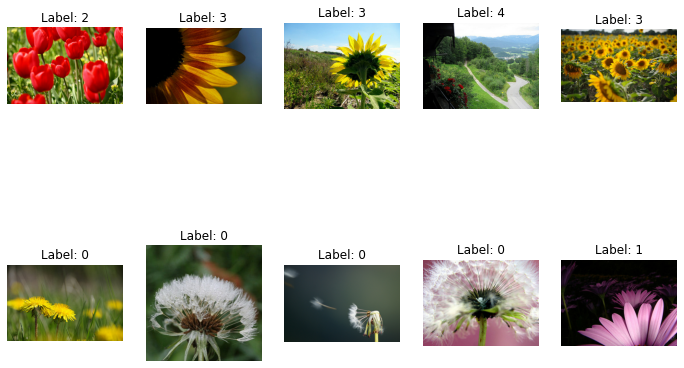

In [37]:
# 이미지를 시각화합니다.
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy())
    plt.title(f"Label: {labels[i].numpy()}")
    plt.axis('off')
plt.show()

- 이미지의 개수와 레이블의 개수, 분포, 이미지 크기 확인

In [38]:
# Load the dataset and get the dataset information
dataset, info = tfds.load('tf_flowers', split='train', as_supervised=True, with_info=True)

# 데이터셋의 이미지 개수를 확인합니다.
num_images = info.splits['train'].num_examples

# 데이터셋의 레이블 개수를 확인합니다.
num_labels = info.features['label'].num_classes

# 클래스 레이블 분포를 확인합니다.
label_counts = [0] * num_labels
for _, label in dataset:
    label_counts[label.numpy()] += 1

# 이미지 크기를 확인합니다.
sample_image, _ = next(iter(dataset))
image_height, image_width, image_channels = sample_image.shape

# 결과 출력
print(f"이미지 개수: {num_images}")
print(f"레이블 개수: {num_labels}")
print("클래스 레이블 분포:")
for i in range(num_labels):
    print(f"Label {i}: {label_counts[i]} 개")

print(f"이미지 크기: {image_height} x {image_width} 픽셀, 채널: {image_channels}")

이미지 개수: 3670
레이블 개수: 5
클래스 레이블 분포:
Label 0: 898 개
Label 1: 633 개
Label 2: 799 개
Label 3: 699 개
Label 4: 641 개
이미지 크기: 333 x 500 픽셀, 채널: 3


- image size resize 후 시각화하여 샘플을 확인한다

Image shape: (224, 224, 3)
Label: tf.Tensor(2, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(4, shape=(), dtype=int64)
Image shape: (224, 224, 3)
Label: tf.Tensor(3, shape=(), dtype=int64)


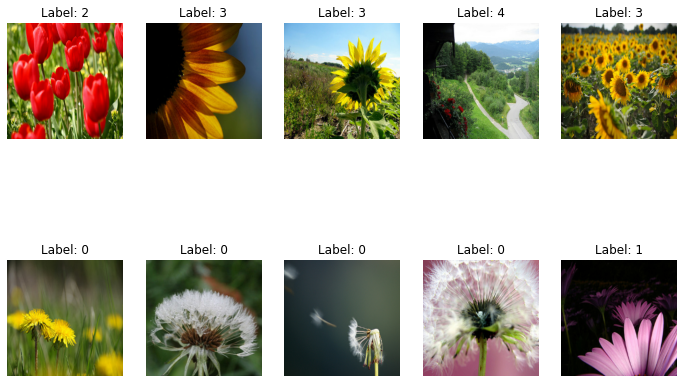

이미지 개수: 3670
레이블 개수: 5
클래스 레이블 분포:
Label 0: 898 개
Label 1: 633 개
Label 2: 799 개
Label 3: 699 개
Label 4: 641 개
이미지 크기: 224 x 224 픽셀, 채널: 3


In [39]:
#이미지 크기 resize
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0  
    image = tf.clip_by_value(image, 0, 1)
    return image, label


# Apply the preprocessing function to the dataset
dataset = dataset.map(preprocess_image)

# 데이터셋 샘플 확인
for image, label in dataset.take(5):
    # 이미지와 라벨을 사용하여 필요한 작업 수행
    print("Image shape:", image.shape)
    print("Label:", label)

# Visualize the first 10 resized images
images = []
labels = []
for image, label in dataset.take(10):
    images.append(image)
    labels.append(label)

# 이미지를 시각화합니다.
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy())
    plt.title(f"Label: {labels[i].numpy()}")
    plt.axis('off')
plt.show()

# Updated dataset information
num_images = info.splits['train'].num_examples
num_labels = info.features['label'].num_classes
label_counts = [0] * num_labels
for _, label in dataset:
    label_counts[label.numpy()] += 1
sample_image, _ = next(iter(dataset))
image_height, image_width, image_channels = sample_image.shape

# 결과 출력
print(f"이미지 개수: {num_images}")
print(f"레이블 개수: {num_labels}")
print("클래스 레이블 분포:")
for i in range(num_labels):
    print(f"Label {i}: {label_counts[i]} 개")
print(f"이미지 크기: {image_height} x {image_width} 픽셀, 채널: {image_channels}")

- 이미지 데이터의 범위에 문제가 발생하여 이미지가 깨져 나오는 문제 발생, info에서 dtype=tf.uint8 
- 원본 이미지의 픽셀 값 범위에 따라 이 값이 [0, 1] 범위를 벗어난다고 판단, preprocess_image 함수 수정.
- 이미지의 데이터 타입을 확인하고 필요한 경우 float32로 변환한 다음, 픽셀 값의 범위를 [0, 1]로 조정

# 2. model build

- vgg16으로 분류모델 학습
- batch size는 32

In [40]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

In [42]:
batch_size = 32

In [43]:
num_examples = info.splits['train'].num_examples
num_train_examples = int(train_ratio * num_examples)
num_val_examples = int(val_ratio * num_examples)
num_test_examples = int(test_ratio * num_examples)

In [44]:
train_dataset = dataset.take(num_train_examples)
val_dataset = dataset.skip(num_train_examples).take(num_val_examples)
test_dataset = dataset.skip(num_train_examples + num_val_examples).take(num_test_examples)

In [45]:
train_batches = train_dataset.shuffle(num_train_examples).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_batches = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_batches = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [46]:
# pre-trained vgg16 을 로드한다.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [47]:
# 사전 훈련된 가중치 유지
for layer in base_model.layers:
    layer.trainable = False

- base model 의 모든 층에 대해 훈련을 중지하도록 설정한다. 사전에 훈련되어있는 가중치를 유지시켜서 새로운 데이터셋의 특정 특징만 학습하도록 설정.
- 훈련 속도 향상시킴
- 기존의 층의 고정하고 새로운 층만 훈련하여 과적합을 방지하는데에 도움이 된다.

In [48]:
# 사용자 분류 헤드 추가, flower dataset 분류작업 수행
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer with a dropout rate of 0.5
predictions = Dense(num_labels, activation='softmax')(x)

- 모델생성

In [49]:
model = Model(inputs=base_model.input, outputs=predictions)

- lr , optimizer 설정

In [50]:
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

- model complie

In [51]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- transfer learning 으로 train  = epcch 5

In [52]:
epochs = 5

## 2.1 train

- 모델에 체크포인트 콜백 추가 (가중치 파일 저장)
- 마지막 10개층을 해제하고 fine-tune
- 모델을 다시 컴파일하며 미세조정을 준비한 후 최적 모델의 가중치를 로드

In [53]:
# 체크포인트 콜백 추가
checkpoint_filepath = 'vgg16_flowers_best_model.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

#훈련
history = model.fit(train_batches, validation_data=val_batches, epochs=epochs, callbacks=[checkpoint])

# 모델의 마지막 몇 층 해제
for layer in model.layers[-10:]:
    layer.trainable = True

# 미세조정 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

fine_tune_epochs = 10

# 최적의 모델 가중치 로드
model.load_weights(checkpoint_filepath)

# 미세조정을 위한 모델 훈련
history_fine_tune = model.fit(train_batches, validation_data=val_batches, epochs=fine_tune_epochs, callbacks=[checkpoint])


Epoch 1/5
69/69 [==============================] - 14s 176ms/step - loss: 1.1019 - accuracy: 0.5781 - val_loss: 0.7088 - val_accuracy: 0.7575

Epoch 00001: val_accuracy improved from -inf to 0.75749, saving model to vgg16_flowers_best_model.h5
Epoch 2/5
69/69 [==============================] - 13s 176ms/step - loss: 0.6001 - accuracy: 0.7902 - val_loss: 0.6484 - val_accuracy: 0.7847

Epoch 00002: val_accuracy improved from 0.75749 to 0.78474, saving model to vgg16_flowers_best_model.h5
Epoch 3/5
69/69 [==============================] - 13s 177ms/step - loss: 0.4544 - accuracy: 0.8415 - val_loss: 0.6455 - val_accuracy: 0.7888

Epoch 00003: val_accuracy improved from 0.78474 to 0.78883, saving model to vgg16_flowers_best_model.h5
Epoch 4/5
69/69 [==============================] - 14s 177ms/step - loss: 0.3550 - accuracy: 0.8856 - val_loss: 0.5825 - val_accuracy: 0.8120

Epoch 00004: val_accuracy improved from 0.78883 to 0.81199, saving model to vgg16_flowers_best_model.h5
Epoch 5/5
69/69

- test dataset 평가

In [54]:
# test accuracy 확인
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test accuracy: {test_accuracy}")

23/23 [==============================] - 4s 130ms/step - loss: 0.4292 - accuracy: 0.8842
Test accuracy: 0.8841961622238159


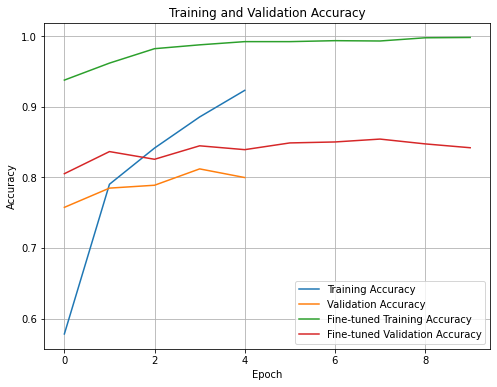

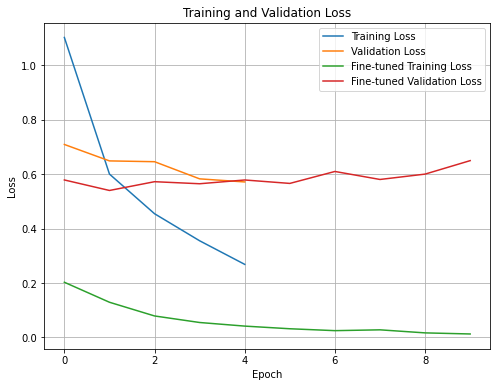

In [55]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuned Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine_tune.history['loss'], label='Fine-tuned Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Fine-tuned Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

- fine tune을 시작하였을때 loss는 감소 accuracy는 향상되었다.
- train epoch 5 진행했기 때문에 끊겨있는 것 확인 가능

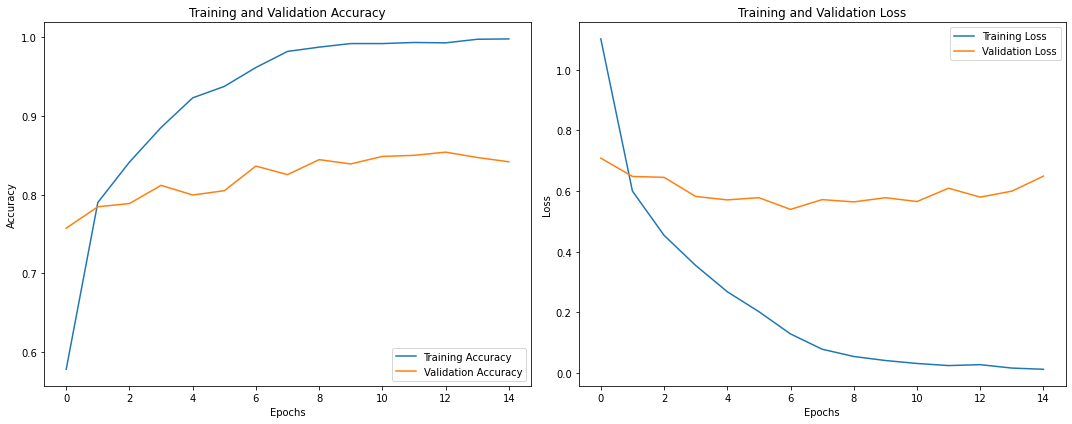

In [56]:
import matplotlib.pyplot as plt

# Training history for the initial training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Training history for the fine-tuning
fine_tune_accuracy = history_fine_tune.history['accuracy']
fine_tune_val_accuracy = history_fine_tune.history['val_accuracy']
fine_tune_loss = history_fine_tune.history['loss']
fine_tune_val_loss = history_fine_tune.history['val_loss']

# Combine the training histories
total_epochs = epochs + fine_tune_epochs
total_accuracy = accuracy + fine_tune_accuracy
total_val_accuracy = val_accuracy + fine_tune_val_accuracy
total_loss = loss + fine_tune_loss
total_val_loss = val_loss + fine_tune_val_loss

# Plot accuracy
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(total_epochs), total_accuracy, label='Training Accuracy')
plt.plot(range(total_epochs), total_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(total_epochs), total_loss, label='Training Loss')
plt.plot(range(total_epochs), total_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

- train & validation Accuracy 점차 증가.
- train & validation loss 점차 감소